In [ ]:
!git clone --recursive https://github.com/facebookresearch/CutLER

Cloning into 'CutLER'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 212 (delta 35), reused 30 (delta 13), pack-reused 137
Receiving objects: 100% (212/212), 21.39 MiB | 21.56 MiB/s, done.
Resolving deltas: 100% (63/63), done.
Submodule 'third_party/TokenCut' (https://github.com/YangtaoWANG95/TokenCut.git) registered for path 'third_party/TokenCut'
Cloning into '/content/CutLER/third_party/TokenCut'...
remote: Enumerating objects: 209, done.        
remote: Counting objects: 100% (59/59), done.        
remote: Compressing objects: 100% (35/35), done.        
remote: Total 209 (delta 40), reused 32 (delta 23), pack-reused 150        
Receiving objects: 100% (209/209), 7.29 MiB | 6.94 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Submodule path 'third_party/TokenCut': checked out '5eba77f56f0fc92ffc79589d0cbb119aab5f9b2d'


In [ ]:
%cd CutLER/

/content/CutLER


In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install git+https://github.com/cocodataset/panopticapi.git
!pip install git+https://github.com/mcordts/cityscapesScripts.git
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-wpynrpeh
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-wpynrpeh
  Resolved https://github.com/facebookresearch/detectron2.git to commit 072713649a9b0069c10aad1aaab819112e8f1e2e
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filena

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 KB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=ce2532e3d291b52e8c66eaf9eda876f5e67b40639616af3d366f8534d93249d3
  Stored in directory: /root/.cache/pip/wheels/d9/1b/13/b526842a9074220158b60dad35d854a13107c

In [ ]:
%cd cutler/demo

/content/CutLER/cutler/demo


In [ ]:
import argparse
import multiprocessing as mp
import numpy as np
import os
import tempfile
import time
import cv2
import matplotlib.pyplot as plt

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.utils.logger import setup_logger
import sys
sys.path.append('./')
sys.path.append('../')
from config import add_cutler_config
from predictor import VisualizationDemo

In [ ]:
def setup_cfg(args):
    # load config from file and command-line arguments
    cfg = get_cfg()
    add_cutler_config(cfg)
    # To use demo for Panoptic-DeepLab, please uncomment the following two lines.
    # from detectron2.projects.panoptic_deeplab import add_panoptic_deeplab_config  # noqa
    # add_panoptic_deeplab_config(cfg)
    cfg.merge_from_file(args.config_file)
    cfg.merge_from_list(args.opts)
    # Disable the use of SyncBN normalization when running on a CPU
    # SyncBN is not supported on CPU and can cause errors, so we switch to BN instead
    if cfg.MODEL.DEVICE == 'cpu' and cfg.MODEL.RESNETS.NORM == 'SyncBN':
        cfg.MODEL.RESNETS.NORM = "BN"
        cfg.MODEL.FPN.NORM = "BN"
    # Set score_threshold for builtin models
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = args.confidence_threshold
    cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = args.confidence_threshold
    cfg.freeze()
    return cfg

In [ ]:
def get_parser(inputs):
    parser = argparse.ArgumentParser(description="Detectron2 demo for builtin configs")
    parser.add_argument(
        "--config-file",
        default="configs/quick_schedules/mask_rcnn_R_50_FPN_inference_acc_test.yaml",
        metavar="FILE",
        help="path to config file",
    )
    parser.add_argument("--webcam", action="store_true", help="Take inputs from webcam.")
    parser.add_argument("--video-input", help="Path to video file.")
    parser.add_argument(
        "--input", help="path to the input image",
    )
    parser.add_argument(
        "--output",
        help="A file or directory to save output visualizations. "
        "If not given, will show output in an OpenCV window.",
    )
    parser.add_argument(
        "--confidence-threshold",
        type=float,
        default=0.35,
        help="Minimum score for instance predictions to be shown",
    )
    parser.add_argument(
        "--opts",
        help="Modify config options using the command-line 'KEY VALUE' pairs",
        default=[],
        nargs=argparse.REMAINDER,
    )
    args = parser.parse_args(inputs)
    return args

In [ ]:
!wget http://dl.fbaipublicfiles.com/cutler/checkpoints/cutler_cascade_final.pth

--2023-03-20 11:01:03--  http://dl.fbaipublicfiles.com/cutler/checkpoints/cutler_cascade_final.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 574672112 (548M) [binary/octet-stream]
Saving to: ‘cutler_cascade_final.pth’

cutler_cascade_fina 100%[===================>] 548.05M  45.9MB/s    in 10s     

2023-03-20 11:01:14 (52.5 MB/s) - ‘cutler_cascade_final.pth’ saved [574672112/574672112]



In [ ]:
# provide arguments for running CutLER demo.

# Note: Using ***CPU*** by default. to run on GPU, remove "MODEL.DEVICE", "cpu".
# Note: please specify a path with "--input" if you want to try your own images.
# Note: you can use a lower --confidence-threshold to get a higher recall.
img_path = "/content/download0.png"
img_path2 = "imgs/demo2.jpg"
mp.set_start_method("spawn", force=True)
inputs = ['--config-file', "../model_zoo/configs/CutLER-ImageNet/cascade_mask_rcnn_R_50_FPN.yaml", '--input', img_path2, '--confidence-threshold', '0.5', "--opts", "MODEL.WEIGHTS", "cutler_cascade_final.pth", "MODEL.DEVICE", "cpu"]
args = get_parser(inputs)

In [ ]:
setup_logger(name="fvcore")
logger = setup_logger()
logger.info("Arguments: " + str(args))
cfg = setup_cfg(args)
demo = VisualizationDemo(cfg)

[03/20 11:03:37 detectron2]: Arguments: Namespace(config_file='../model_zoo/configs/CutLER-ImageNet/cascade_mask_rcnn_R_50_FPN.yaml', webcam=False, video_input=None, input='imgs/demo2.jpg', output=None, confidence_threshold=0.5, opts=['MODEL.WEIGHTS', 'cutler_cascade_final.pth', 'MODEL.DEVICE', 'cpu'])
[03/20 11:03:38 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from cutler_cascade_final.pth ...
[03/20 11:03:38 fvcore.common.checkpoint]: [Checkpointer] Loading from cutler_cascade_final.pth ...


In [ ]:
# use PIL, to be consistent with evaluation
img = read_image(args.input, format="BGR")
start_time = time.time()
predictions, visualized_output = demo.run_on_image(img)
logger.info(
    "{}: {} in {:.2f}s".format(
        args.input,
        "detected {} instances".format(len(predictions["instances"]))
        if "instances" in predictions
        else "finished",
        time.time() - start_time,
    )
)

# save image to your local directory
if args.output:
    if os.path.isdir(args.output):
        assert os.path.isdir(args.output), args.output
        out_filename = os.path.join(args.output, os.path.basename(args.input))
    else:
        assert len(args.input) == 1, "Please specify a directory with args.output"
        out_filename = args.output
    visualized_output.save(out_filename)

[03/20 11:03:49 detectron2]: imgs/demo2.jpg: detected 19 instances in 10.07s


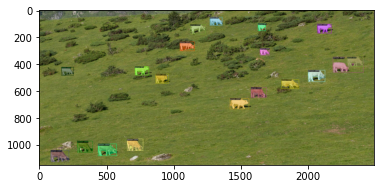

In [ ]:
plt.imshow(visualized_output.get_image())

In [ ]:
!pip-chill

albumentations==1.2.1
altair==4.2.2
astropy==5.2.1
autograd==1.5
bs4==0.0.1
chardet==3.0.4
cityscapesscripts==2.2.1
cmake==3.25.2
colored==1.4.4
community==1.0.0b1
contextlib2==0.6.0.post1
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.0
cython==0.29.33
datascience==0.17.6
dbus-python==1.2.16
debugpy==1.6.6
detectron2==0.6
distributed==2022.12.1
dlib==19.24.0
dopamine-rl==1.0.5
earthengine-api==0.1.345
easydict==1.10
editdistance==0.5.3
en-core-web-sm==3.5.0
faiss-gpu==1.7.2
fastai==2.7.11
fastrlock==0.8.1
firebase-admin==5.3.0
fix-yahoo-finance==0.0.22
gdal==3.3.2
gdown==4.5.4
gensim==3.6.0
geopy==1.17.0
glob2==0.7
google==2.0.3
google-cloud-datastore==2.11.1
google-cloud-language==2.6.1
google-cloud-translate==3.8.4
google-colab==1.0.0
googledrivedownloader==0.4
graphviz==0.10.1
grpcio-status==1.48.2
gspread-dataframe==3.0.8
holoviews==1.14.9
html5lib==1.1
httpimport==1.3.0
humanize==4.6.0
hyperopt==0.2.7
imagehash==4.3.1
imblearn==0.0
imgaug==0.4.0
imutils==0.5.4
inflect==6.0.2
ipython-

In [1]:
!pip freeze

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.15.1
astropy==5.2.1
astunparse==1.6.3
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==3.0.4
charset-normalizer==2.0.12
chex==0.1.6
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==39.0.2
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
distributed==2022.12.1
dlib==19.24.0
dm-tree==0.1.8
docutils==0